In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('prediction-interval-competition-ii-house-price/dataset.csv')
df.head()

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,...,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,0,0,0,0,0,0,0,0,0,P


In [3]:
df.shape

(200000, 47)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 non-null  int64  
 16  year_built        20

In [5]:
for col in df.select_dtypes('object').columns:
  if(len(df[col].unique()) <= 20):
    print(f'{col} : {df[col].value_counts()}\n')
  else:
    print(f'{col} : {len(df[col].unique())}\n')

sale_date : 313


join_status : join_status
nochg               126281
new                  53085
reno - before         5864
rebuilt - before      3706
rebuilt - after       3095
demo                  2869
reno - after          2632
miss99                2468
Name: count, dtype: int64

city : 41

zoning : 500

subdivision : 10377

submarket : submarket
K    21002
B    16289
I    15842
R    14404
Q    14005
O    12528
D    12404
F    12401
M    10722
L    10579
C    10091
N    10052
A     7588
P     6971
E     6743
G     6144
J     5789
S     3672
H     1057
Name: count, dtype: int64



In [6]:
df['area'].unique()

array([ 53,  74,  30,  96,  36,  82,  51,  54,  11,  95,  60,  35,  71,
        43,  28,  26,  86,  65,  22,  14,  70,  67,  21,  56,  25,  38,
        24,  93,   4,  32,  50,  80,  66,  27,  18,  13,  98, 100,  62,
        19,  15,  39,  37,  75,  79,  29,  85,  44,  42,   7,  31,  64,
        47,  91,   8,  61,  69,  68,  33,  16,  73,   1,  17,   6,  72,
        92,  81,  58,  48,  59,  97,  20,  57,   3,  88,  23,  52,  12,
        45,  63,  34,  87,  77,   2,  55,  46,  94,  41,  49,  40,  84,
         9,  76,   5,  10,  78,  90])

In [7]:
df.isna().sum()

id                      0
sale_date               0
sale_price              0
sale_nbr            42182
sale_warning            0
join_status             0
join_year               0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
subdivision         17550
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascade

In [8]:
df1 = df.copy()

In [9]:
df['sale_nbr']=df['sale_nbr'].fillna(1)
df['sale_nbr'].isna().sum()

0

In [10]:
for col in df1.columns:
  if(len(df[col].unique()) <= 20):
    print(f'{col} : {df[col].value_counts()}\n')
  else:
    print(f'{col} : {len(df[col].unique())}\n')

id : 200000

sale_date : 313

sale_price : 22687

sale_nbr : sale_nbr
1.0     91159
2.0     60735
3.0     29924
4.0     12167
5.0      4287
6.0      1280
7.0       333
8.0        84
9.0        22
10.0        5
11.0        4
Name: count, dtype: int64


join_status : join_status
nochg               126281
new                  53085
reno - before         5864
rebuilt - before      3706
rebuilt - after       3095
demo                  2869
reno - after          2632
miss99                2468
Name: count, dtype: int64

join_year : join_year
2025    187720
1999     12280
Name: count, dtype: int64

latitude : 5735

longitude : 7118

area : 97

city : 41

zoning : 500

subdivision : 10377

present_use : present_use
2     183153
29     15408
6       1439
Name: count, dtype: int64

land_val : 3186

imp_val : 3417

year_built : 126

year_reno : 91

sqft_lot : 26081

sqft : 2546

sqft_1 : 1698

sqft_fbsmt : 697

grade : grade
7     79421
8     59385
9     26305
6     18329
10     9877
11     3105

In [11]:
df1['sale_date'] = pd.to_datetime(df1['sale_date'])

In [12]:
df1[df1['sale_date'].dt.year == 2025].sale_price.mean(),df1[df1['sale_date'].dt.year == 2010].sale_price.mean()

(1225245.3846153845, 475617.8311988243)

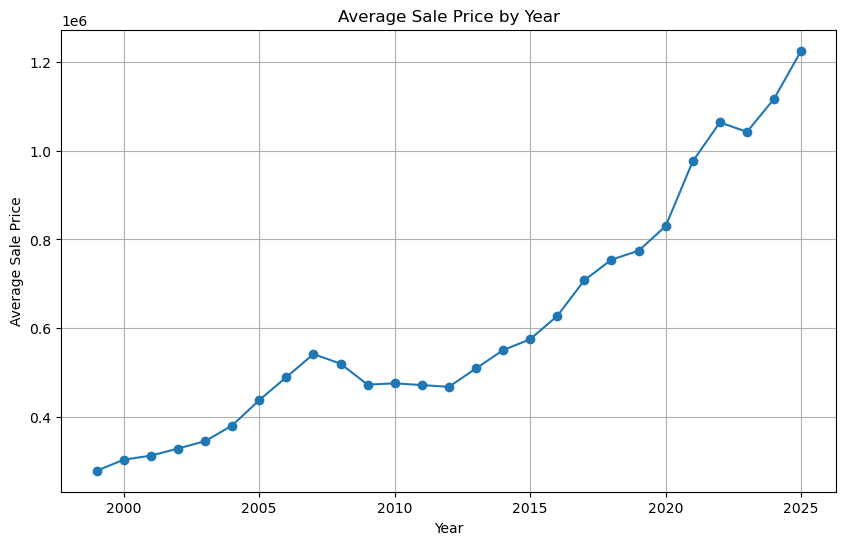

In [13]:
import matplotlib.pyplot as plt

# Create a new column for year
df1['sale_year'] = df1['sale_date'].dt.year

# Group by year and calculate average sale price
yearly_avg = df1.groupby('sale_year')['sale_price'].mean()

# Plot the trend
plt.figure(figsize=(10,6))
yearly_avg.plot(marker='o')
plt.title("Average Sale Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.grid(True)
plt.show()

In [14]:
df1['sale_year'].dtype

dtype('int32')

In [15]:
df1.columns

Index(['id', 'sale_date', 'sale_price', 'sale_nbr', 'sale_warning',
       'join_status', 'join_year', 'latitude', 'longitude', 'area', 'city',
       'zoning', 'subdivision', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full',
       'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket', 'sale_year'],
      dtype='object')

In [16]:
# to drop [join_year,subdivision, ]

In [17]:
# var.unique(), df1['land_val'].isna().sum()

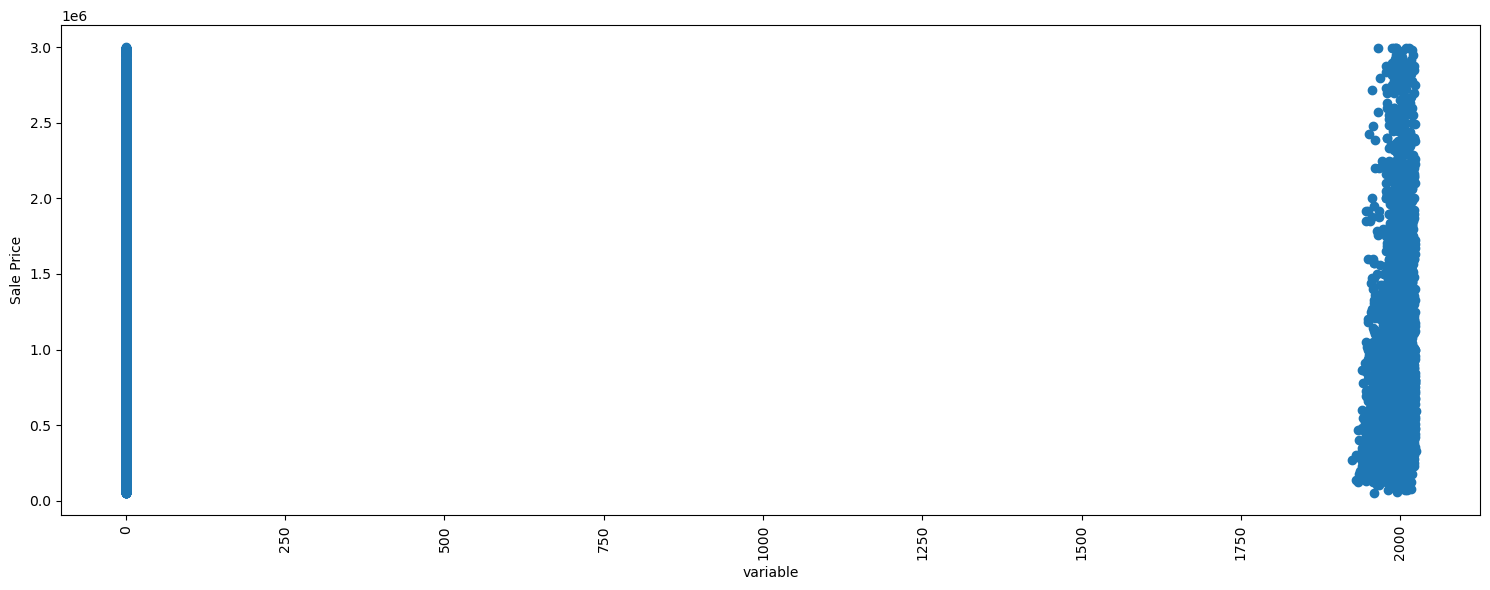

In [18]:
df_clean = df1.dropna(subset=['year_reno', 'sale_price'])

var = df_clean['year_reno']
target = df_clean['sale_price']

plt.figure(figsize=(15,6))
plt.scatter(var, target)
plt.xlabel("variable",)
plt.xticks(rotation=90)
plt.ylabel("Sale Price",)
plt.tight_layout()

In [19]:
df1['age'] = df1['sale_year'] - df1['year_built']

In [20]:
df1[df1['age'] < 0][['year_built', 'sale_year', 'sale_price']]  # incorrect data

,year_built,sale_year,sale_price
24,2019,2005,215000
65,2021,2012,360000
94,2009,2008,640000
116,2000,1999,235000
137,2019,2013,1500000
...,...,...,...
199787,2015,2006,527000
199790,2022,2011,1072000
199852,2009,2005,535000
199950,2014,1999,164500


In [21]:
df2 = df1[df1['year_built'] <= df1['sale_year']]
df2.shape

(195676, 49)

In [22]:
df2['renovated'] = df2['year_reno'] != 0
df2['renovated'] = df2['renovated'].astype('int8')
df2['renovated'].dtype

/tmp/ipykernel_10602/209182768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['renovated'] = df2['year_reno'] != 0
/tmp/ipykernel_10602/209182768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['renovated'] = df2['renovated'].astype('int8')


dtype('int8')

In [23]:
df2['total_bathroom'] = (df2['bath_full'] + 0.75 * df2['bath_3qtr'] + 0.5 * df2['bath_half'])
df2['total_bathroom']

/tmp/ipykernel_10602/2426575670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_bathroom'] = (df2['bath_full'] + 0.75 * df2['bath_3qtr'] + 0.5 * df2['bath_half'])


0         1.75
1         2.25
2         2.50
3         2.50
4         3.25
          ... 
199995    1.75
199996    2.50
199997    1.75
199998    2.50
199999    1.75
Name: total_bathroom, Length: 195676, dtype: float64

In [24]:
cols_to_drop = ['join_year','subdivision','bath_full','bath_3qtr','bath_half','year_built','year_reno','sale_date']
df3 = df2.drop(cols_to_drop, axis=1)
df3.head()

,id,sale_price,sale_nbr,sale_warning,join_status,latitude,longitude,area,city,zoning,...,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,sale_year,age,renovated,total_bathroom
0,0,236000,2.0,,nochg,47.2917,-122.3658,53,FEDERAL WAY,RS7.2,...,0,0,0,0,0,I,2014,39,0,1.75
1,1,313300,NaN,26,nochg,47.6531,-122.1996,74,KIRKLAND,RS 8.5,...,0,1,0,0,0,Q,1999,37,0,2.25
2,2,341000,1.0,,nochg,47.4733,-122.1901,30,RENTON,R-8,...,0,0,0,0,0,K,2006,20,0,2.50
3,3,267000,1.0,,nochg,47.4739,-122.3295,96,BURIEN,RS-7200,...,0,0,0,0,0,G,1999,1,0,2.50
4,4,1650000,2.0,,miss99,47.7516,-122.1222,36,KING COUNTY,RA2.5,...,0,0,0,0,0,P,2018,20,0,3.25


In [25]:
df3.columns

Index(['id', 'sale_price', 'sale_nbr', 'sale_warning', 'join_status',
       'latitude', 'longitude', 'area', 'city', 'zoning', 'present_use',
       'land_val', 'imp_val', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'garb_sqft',
       'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other', 'submarket', 'sale_year', 'age',
       'renovated', 'total_bathroom'],
      dtype='object')

In [26]:
df3['sale_warning'].unique()

array(['   ', ' 26 ', ' 15 26 ', ' 15 ', ' 40 ', ' 10 ', ' 41 ', ' 56 ',
       ' 10 15 ', ' 17 ', ' 60 ', ' 35 ', ' 10 15 56 ', ' 26 56 ', ' 29 ',
       ' 38 ', ' 57 ', ' 26 60 ', ' 15 40 ', ' 3 ', ' 54 ', ' 41 57 ',
       ' 10 36 ', ' 34 36 ', ' 3 15 ', ' 28 56 ', ' 41 60 ', ' 16 ',
       ' 30 35 ', ' 26 41 ', ' 3 15 26 ', ' 17 54 ', ' 56 57 ', ' 57 60 ',
       ' 10 56 ', ' 26 56 60 ', ' 55 ', ' 4 ', ' 10 26 ', ' 26 29 ',
       ' 34 ', ' 15 56 ', ' 29 36 ', ' 15 35 ', ' 3 26 ', ' 44 ',
       ' 15 38 ', ' 29 56 ', ' 15 26 29 ', ' 15 26 44 ', ' 15 29 ',
       ' 15 44 ', ' 15 54 ', ' 3 15 29 ', ' 26 34 ', ' 15 16 ', ' 15 60 ',
       ' 28 ', ' 45 ', ' 15 17 54 ', ' 26 35 ', ' 15 41 ', ' 10 15 16 ',
       ' 15 16 54 ', ' 15 26 56 ', ' 15 * ', ' 36 ', ' 10 15 16 26 ',
       ' 3 35 ', ' 10 29 ', ' 26 38 ', ' 10 29 36 ', ' 24 ', ' 15 29 36 ',
       ' 26 40 ', ' 4 15 ', ' 26 57 ', ' 58 ', ' 45 56 60 ', ' 15 45 ',
       ' 10 15 36 ', ' 26 29 56 ', ' 30 ', ' 56 60 ', ' 80 ', ' 10 34

In [27]:
test_df = pd.read_csv('prediction-interval-competition-ii-house-price/test.csv')
test_df.head()

,id,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,200000,2022-12-15,4.0,,new,2025,47.4794,-122.2212,25,RENTON,...,0,0,0,0,0,0,0,0,0,J
1,200001,2000-10-15,2.0,,new,2025,47.5778,-122.0270,69,SAMMAMISH,...,0,0,0,0,0,0,0,0,0,O
2,200002,2004-06-15,1.0,,nochg,2025,47.5632,-122.1623,31,BELLEVUE,...,3,0,3,3,0,2,0,0,0,R
3,200003,2009-11-15,1.0,,nochg,2025,47.6911,-122.3469,6,SEATTLE,...,0,0,0,0,0,0,0,0,0,B
4,200004,1999-06-15,1.0,,reno - before,1999,47.4001,-122.4146,100,KING COUNTY,...,0,2,4,0,3,0,0,0,0,H


## Todo if accuracy is not good

In [28]:
# final = set()
# for s in df3['sale_warning'].unique():
#   for code in s.strip().split():
#     final.add(code)
# final

In [29]:
# test = set()
# for s in test_df['sale_warning'].unique():
#   for code in s.strip().split():
#     test.add(code)
# test

In [30]:
# print("final & test:", final & test)  # empty set here: set()

## continue

In [31]:
df3.columns

Index(['id', 'sale_price', 'sale_nbr', 'sale_warning', 'join_status',
       'latitude', 'longitude', 'area', 'city', 'zoning', 'present_use',
       'land_val', 'imp_val', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'garb_sqft',
       'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic',
       'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
       'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
       'view_otherwater', 'view_other', 'submarket', 'sale_year', 'age',
       'renovated', 'total_bathroom'],
      dtype='object')

In [32]:
df3.isna().sum()

id                      0
sale_price              0
sale_nbr            41616
sale_warning            0
join_status             0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
present_use             0
land_val                0
imp_val                 0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascades           0
view_territorial        0
view_skyline            0
view_sound              0
view_lakewash           0
view_lakesamm           0
view_otherwater         0
view_other              0
submarket   

In [33]:
import seaborn as sns

In [34]:
# df3[df3['age'] < 0]

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195676 entries, 0 to 199999
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                195676 non-null  int64  
 1   sale_price        195676 non-null  int64  
 2   sale_nbr          154060 non-null  float64
 3   sale_warning      195676 non-null  object 
 4   join_status       195676 non-null  object 
 5   latitude          195676 non-null  float64
 6   longitude         195676 non-null  float64
 7   area              195676 non-null  int64  
 8   city              195676 non-null  object 
 9   zoning            195676 non-null  object 
 10  present_use       195676 non-null  int64  
 11  land_val          195676 non-null  int64  
 12  imp_val           195676 non-null  int64  
 13  sqft_lot          195676 non-null  int64  
 14  sqft              195676 non-null  int64  
 15  sqft_1            195676 non-null  int64  
 16  sqft_fbsmt        195676 

In [36]:
for col in df3.select_dtypes(include='object').columns:
    print(f"{col}: {df3[col].nunique()} unique values")

join_status: 7 unique values
city: 41 unique values
zoning: 500 unique values
submarket: 19 unique values


### **** zone ohe for top 10 ****

In [37]:
set(df3['zoning'].value_counts().head(10).index) - set(test_df['zoning'].unique())  # all 10 are there in test data

set()

In [38]:
set(df3['city'].value_counts().head(15).index) - set(test_df['city'].unique())    # all 15 are there in test

set()

In [39]:
df4 = df3.drop('sale_warning', axis=1)

In [40]:
top_10_zones = df4['zoning'].value_counts().head(10).index.tolist()
df4['zoning_top10'] = df4['zoning'].where(df4['zoning'].isin(top_10_zones), other='Other')
df4['zoning_top10'].unique()

array(['RS7.2', 'Other', 'R-8', 'NR3', 'SR-6', 'R6', 'R4', 'RA5', 'R-5',
       'R-6', 'NR2'], dtype=object)

In [41]:
zoning_ohe = pd.get_dummies(df4['zoning_top10'], prefix='zoning')
df4 = pd.concat([df3, zoning_ohe], axis=1)

In [42]:
df4 = df4.drop(['zoning', 'zoning_Other'], axis=1)
df4.columns

Index(['id', 'sale_price', 'sale_nbr', 'sale_warning', 'join_status',
       'latitude', 'longitude', 'area', 'city', 'present_use', 'land_val',
       'imp_val', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade',
       'fbsmt_grade', 'condition', 'stories', 'beds', 'garb_sqft', 'gara_sqft',
       'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier',
       'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline',
       'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater',
       'view_other', 'submarket', 'sale_year', 'age', 'renovated',
       'total_bathroom', 'zoning_NR2', 'zoning_NR3', 'zoning_R-5',
       'zoning_R-6', 'zoning_R-8', 'zoning_R4', 'zoning_R6', 'zoning_RA5',
       'zoning_RS7.2', 'zoning_SR-6'],
      dtype='object')

In [43]:
top_10_zones

['NR3', 'R6', 'R4', 'RA5', 'NR2', 'SR-6', 'R-6', 'RS7.2', 'R-5', 'R-8']

### ohe for join_status

In [44]:
join_dummies = pd.get_dummies(df4['join_status'], prefix='join')
df4 = pd.concat([df4, join_dummies], axis=1)
df4 = df4.drop('join_status', axis=1)

In [45]:
df4.columns

Index(['id', 'sale_price', 'sale_nbr', 'sale_warning', 'latitude', 'longitude',
       'area', 'city', 'present_use', 'land_val', 'imp_val', 'sqft_lot',
       'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition',
       'stories', 'beds', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket', 'sale_year', 'age', 'renovated', 'total_bathroom',
       'zoning_NR2', 'zoning_NR3', 'zoning_R-5', 'zoning_R-6', 'zoning_R-8',
       'zoning_R4', 'zoning_R6', 'zoning_RA5', 'zoning_RS7.2', 'zoning_SR-6',
       'join_demo', 'join_miss99', 'join_new', 'join_nochg',
       'join_rebuilt - before', 'join_reno - after', 'join_reno - before'],
      dtype='object')

In [46]:
df4 = df4.drop('join_new', axis=1)

## fill null and then OHE for submarket

In [47]:
set(test_df['submarket'].unique()) == set(df4['submarket'].unique())

True

In [48]:
df4['submarket'].unique()

array(['I', 'Q', 'K', 'G', 'P', 'B', 'D', 'O', 'L', 'R', 'J', 'E', 'M',
       'A', 'N', 'F', nan, 'H', 'C', 'S'], dtype=object)

In [49]:
df4['submarket'] = df4['submarket'].fillna('Unknown')

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
ohe = OneHotEncoder()

In [52]:
col_trans = ColumnTransformer([('ohe', ohe, ['submarket'])], remainder='passthrough')

In [53]:
df5 = col_trans.fit_transform(df4)

In [54]:
ohe_feature_names = col_trans.named_transformers_['ohe'].get_feature_names_out(['submarket'])
ohe_feature_names

array(['submarket_A', 'submarket_B', 'submarket_C', 'submarket_D',
       'submarket_E', 'submarket_F', 'submarket_G', 'submarket_H',
       'submarket_I', 'submarket_J', 'submarket_K', 'submarket_L',
       'submarket_M', 'submarket_N', 'submarket_O', 'submarket_P',
       'submarket_Q', 'submarket_R', 'submarket_S', 'submarket_Unknown'],
      dtype=object)

In [55]:
passthrough_cols = [col for col in df4.columns if col != 'submarket']

all_column_names = list(ohe_feature_names) + passthrough_cols

df5 = pd.DataFrame(df5, columns=all_column_names, index=df4.index)

In [56]:
df5.columns

Index(['submarket_A', 'submarket_B', 'submarket_C', 'submarket_D',
       'submarket_E', 'submarket_F', 'submarket_G', 'submarket_H',
       'submarket_I', 'submarket_J', 'submarket_K', 'submarket_L',
       'submarket_M', 'submarket_N', 'submarket_O', 'submarket_P',
       'submarket_Q', 'submarket_R', 'submarket_S', 'submarket_Unknown', 'id',
       'sale_price', 'sale_nbr', 'sale_warning', 'latitude', 'longitude',
       'area', 'city', 'present_use', 'land_val', 'imp_val', 'sqft_lot',
       'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition',
       'stories', 'beds', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'sale_year', 'age', 'renovated', 'total_bathroom', 'zoning_NR2',
       'zoning_NR3', 'zoning_R-5', 'zoning_R-6', 'zoning_R-8', 'zoning_R

In [57]:
df5 = df5.drop('sale_warning',axis=1)

In [58]:
df5['city'].value_counts().head(15).index

Index(['SEATTLE', 'KING COUNTY', 'BELLEVUE', 'SAMMAMISH', 'KENT', 'RENTON',
       'KIRKLAND', 'FEDERAL WAY', 'AUBURN', 'SHORELINE', 'MAPLE VALLEY',
       'REDMOND', 'BURIEN', 'ISSAQUAH', 'COVINGTON'],
      dtype='object', name='city')

## ohe for city top 10

In [59]:
set(test_df['city'].unique()) == set(df5['city'].unique())

True

In [60]:
top_15_cities = df5['city'].value_counts().head(15).index.tolist()

In [61]:
df5['city'] = df5['city'].apply(lambda x: x if x in top_15_cities else 'Other')
df5['city'].unique()

array(['FEDERAL WAY', 'KIRKLAND', 'RENTON', 'BURIEN', 'KING COUNTY',
       'SEATTLE', 'KENT', 'SAMMAMISH', 'AUBURN', 'COVINGTON', 'ISSAQUAH',
       'BELLEVUE', 'MAPLE VALLEY', 'Other', 'REDMOND', 'SHORELINE'],
      dtype=object)

In [62]:
city_col_trans = ColumnTransformer([('ohe', OneHotEncoder(), ['city'])], remainder='passthrough')

In [63]:
df6 = city_col_trans.fit_transform(df5)

In [64]:
ohe_city_names = city_col_trans.named_transformers_['ohe'].get_feature_names_out(['city'])
ohe_city_names

array(['city_AUBURN', 'city_BELLEVUE', 'city_BURIEN', 'city_COVINGTON',
       'city_FEDERAL WAY', 'city_ISSAQUAH', 'city_KENT',
       'city_KING COUNTY', 'city_KIRKLAND', 'city_MAPLE VALLEY',
       'city_Other', 'city_REDMOND', 'city_RENTON', 'city_SAMMAMISH',
       'city_SEATTLE', 'city_SHORELINE'], dtype=object)

In [65]:
city_passthrough_cols = [col for col in df5.columns if col != 'city']

all_column_names = list(ohe_city_names) + city_passthrough_cols

df6 = pd.DataFrame(df6, columns=all_column_names, index=df5.index)

In [66]:
df6.head()

,city_AUBURN,city_BELLEVUE,city_BURIEN,city_COVINGTON,city_FEDERAL WAY,city_ISSAQUAH,city_KENT,city_KING COUNTY,city_KIRKLAND,city_MAPLE VALLEY,...,zoning_R6,zoning_RA5,zoning_RS7.2,zoning_SR-6,join_demo,join_miss99,join_nochg,join_rebuilt - before,join_reno - after,join_reno - before
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [67]:
df6 = df6.astype(float)

In [68]:
X = df6.drop(['sale_price','city_Other'], axis=1)
y = df6['sale_price']

In [69]:
X['sale_nbr'] = X['sale_nbr'].fillna(1)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7527527643658349

In [73]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9258878299672648

In [90]:
from sklearn.ensemble import HistGradientBoostingRegressor

lower = HistGradientBoostingRegressor(loss='quantile', quantile=0.05)
upper = HistGradientBoostingRegressor(loss='quantile', quantile=0.95)

lower.fit(X_train, y_train)
upper.fit(X_train, y_train)

HistGradientBoostingRegressor(loss='quantile', quantile=0.95)

In [91]:
lower.score(X_test,y_test), upper.score(X_test,y_test)

(0.45781121093134025, 0.7082653797757492)

In [92]:
pi_lower = lower.predict(X_test)
pi_upper = upper.predict(X_test)

In [93]:
pi_lower[0],pi_upper[0]

(197092.38778385601, 311842.79110257886)

In [95]:
weighted_interval_score(y_test, pi_lower, pi_upper,)

403774.19467487774

In [87]:
import numpy as np

def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return np.where(e < 0, q * (-e), (1 - q) * e)

class XGBQuantile:
    def __init__(self, quantile, **kwargs):
        self.quantile = quantile
        self.model = XGBRegressor(objective='reg:squarederror', **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

lower_model = XGBQuantile(quantile=0.05, n_estimators=200, max_depth=6, learning_rate=0.1)
upper_model = XGBQuantile(quantile=0.95, n_estimators=200, max_depth=6, learning_rate=0.1)

lower_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)
# Predict bounds
pi_lower = lower_model.predict(X_test)
pi_upper = upper_model.predict(X_test)

In [88]:
def weighted_interval_score(y_true, l, u, alpha=0.1):
    interval_width = u - l
    below = (y_true < l).astype(float)
    above = (y_true > u).astype(float)
    score = interval_width + (2 / alpha) * (l - y_true) * below + (2 / alpha) * (y_true - u) * above
    return np.mean(score)

weighted_interval_score(y_test, pi_lower, pi_upper,)

1248826.923975847

In [89]:
pi_upper[0], pi_lower[0]

(236666.86, 236666.86)